# Exercice d'échantillonage

Cet exercice a comme but d'illustrer le calcul de la moyenne et de l'écart-type pour une population respectivement un échantillon de cette population. Pour l'échantillon, nous calculons également les intervalles de confiance pour la moyenne et l'écart-type.

## Préparation des données

Pour cet exercice, nous allons calculer la proportion de la population âgée moins de 20 ans pour l'ensemble des 1365 régions Z05 suisses. Le fichier d'origine se trouve dans `data/demo.xlsx`. Nous avons converti ce fichier en format TSV (_Tab-Separated Values_) que nous utilisons pour lire les données avec R:

In [1]:
d = read.csv(file="../data/stats/demo.tsv", sep="\t")

et calculer la proportion des moins de 20 ans:

In [2]:
d$jeunes = (d$P0004M + d$P0004F + d$P0509M + d$P0509F + d$P1014M + d$P1014F + d$P1519M + d$P1519F) / (d$PTOT)

Nous pouvons afficher quelques valeurs de statistique descriptive pour cette nouvelle variable:

In [3]:
summary(d$jeunes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07416 0.18890 0.21150 0.21020 0.23280 0.33100 

ainsi que le nombre d'unités spatiales:

In [4]:
length(d$jeunes)

[1] 1365

Pour cet exercice, nous faisons une sélection aléatoire de 100 unités spatiales:

In [5]:
de = d[sample(1:nrow(d), 100, replace=FALSE),]

_(il n'est pas nécessaire de comprendre comment cette sélection fonctionne exactement au niveau du code; généralement on ne procède pas de cette façon étant donné qu'on ne travaille pas sur un échantillon si on a toutes les données à disposition)_

## Moyenne et écart-type

Voici la moyenne de la proportion de jeunes sur la base de notre échantillon (les valeurs varient d'une fois à l'autre puisqu'il s'agit d'un échantillon aléatoire):

In [6]:
mean(de$jeunes)

[1] 0.2136227

à comparer avec la moyenne sur l'ensemble de la population:

In [7]:
mean(d$jeunes)

[1] 0.2101595

L'écart-type de notre échantillon de 100 unités spatiales peut être calculé très simplement dans R:

In [8]:
sd(de$jeunes)

[1] 0.04164007

tandis que l'écart-type sur l'ensemble de la population doit être calculé manuellement:

In [9]:
sqrt(mean(d$jeunes^2) - mean(d$jeunes)^2)

[1] 0.03533503

En effet, R utilise dans la fonction `sd` (standard deviation = écart-type) la formule pour l'écart-type d'un échantillon.

## Intervalle de confiance

En plus de l'estimation de la moyenne de la proportion des jeunes sur la base de notre échantillon, nous pouvons estimer l'intervalle dans lequel la _vraie valeur_ se trouve avec une certaine probabilité.

Pour calculer l'intervalle de confiance, nous devons connaître la distribution de la variable. Nous pouvons dans un premier temps faire un histogramme des fréquences avec la commande `hist`:

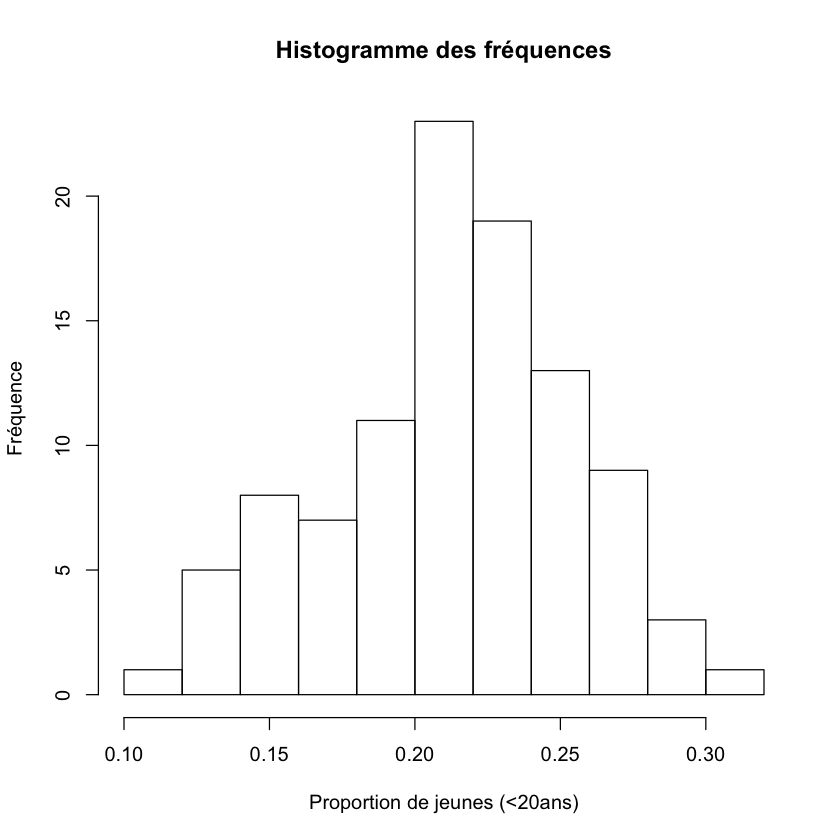

In [10]:
hist(
    de$jeunes, 
    main="Histogramme des fréquences",
    xlab="Proportion de jeunes (<20ans)",
    ylab="Fréquence"
)

Sur la base de l'histogramme, nous pouvons supposer que la variable de la proportion des jeunes suit une loi normale (respectivement une loi de Student). Nous pouvons encore faire un test statistique pour valider cette hypothèse, p.ex. à l'aide d'un test de Kolmogorov-Smirnov. Avec ce test nous évaluons les hypothèses suivantes:

$H_0$: La variable suit une loi normale  
$H_1$: La variable ne suit pas une loi normale

Le test de Kolmogorov-Smirnov calcule une statistique $D$ que nous pouvons obtenir avec R, ensemble avec la valeur-p. Dans notre cas, nous pouvons calculer le test comme suit:

In [11]:
ks.test(de$jeunes, "pnorm", mean=mean(de$jeunes), sd=sd(de$jeunes))


	One-sample Kolmogorov-Smirnov test

data:  de$jeunes
D = 0.079902, p-value = 0.5457
alternative hypothesis: two-sided


La valeur-p ne permet pas de rejeter l'hypothèse $H_0$ et de conclure que la proportion de jeunes semble en effet suivre une loi normale.

Pour rappel, si la valeur-p est inférieure à un seuil préalablement défini (souvent 1% ou 5%, voire 0.1%), on rejette l'hypothèse $H_0$. Typiquement avec une valeur de $p > 0.1$, il n'y a pas de raison de rejeter l'hypothèse $H_0$.

_(Nous allons voir d'avantage sur les tests plus loin.)_

Ainsi, l'intervalle de confiance pour une probabilité de 95% peut être calculée comme suit:

In [12]:
m = mean(de$jeunes)
s = sd(de$jeunes)
n = length(de$jeunes)
erreur = qt(0.975, df=n-1) * s / sqrt(n)
left = m - erreur
right = m + erreur

Et pour afficher l'intervalle, y compris la moyenne:

In [13]:
c(left, m, right)

[1] 0.2053604 0.2136227 0.2218850

La _moyenne de la population_ pour la proportion de jeunes dans les régions Z05 en Suisse se situe donc avec une probabilité de 95% dans l'intervalle 20.54% à 22.19%. (P.S. Les valeurs exactes peuvent varier d'une fois à l'autre en fonction de l'échantillon aléatoire.)

Dans notre cas spécial, nous connaissons en fait la vraie valeur de la population, qui est de 21.01%. Il arrive en moyenne 1 fois sur 20 que cette valeur soit en dehors de l'intervalle calculé.

On peut aussi calculer l'intervalle avec une probabilté de 99%. Du coup l'intervalle est un peu plus large et la probabilité que la _vraie valeur_ soit à l'intérieur est plus grande:

In [14]:
erreur = qt(0.995, df=n-1) * s / sqrt(n)
left = m - erreur
right = m + erreur
c(left, m, right)

[1] 0.2026863 0.2136227 0.2245590

et l'intervalle est dans ce cas de 20.27% à 22.46%.

Si vous avez fait très attention, vous avez peut-être constaté que nous avons utiliser la loi de Student et non la loi normale (`qt` au lieu de `qnorm`). Ceci pour palier aux problèmes avec les petits échantillons. Et nous avons utilisé pour l'intervalle à 95% la valeur $0.975$ et non $0.95$. Ceci vient du fait que nous calculons l'erreur pour un côté de l'intervalle seulement, il faut donc prendre $1 - (a/2)$ si $a$ est 5%.